In [1]:
%matplotlib inline 
import numpy as np
import h5py
import caffe
import matplotlib.pyplot as plt

In [2]:
#Read non-labeled data
f = h5py.File("/home/alexsavo/caffe-facialkp/facialkp-unlabeled.hd5", "r")
X = f['data'][:]
#Y = f['label']
#D = f['certainty']
f.close()

In [3]:
#Expect 1783 images, 96x96 each
X.shape

(1783, 1, 96, 96)

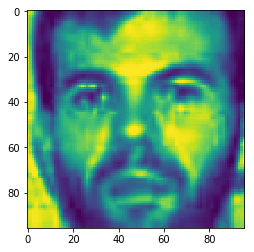

In [4]:
#Draw some random picture
plt.imshow(X[920,0,:,:])

In [5]:
Xshaped = X[920,:,:].copy()
Xshaped = Xshaped.reshape((1,1,96,96))

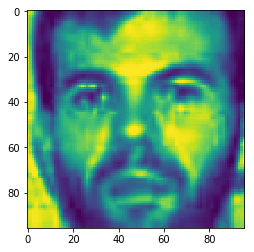

In [6]:
plt.imshow(Xshaped[0,0,:,:])

In [7]:
net = caffe.Net('/home/alexsavo/caffe-facialkp/facialkp_deploy.prototxt',
                '/home/alexsavo/caffe-facialkp/fkp-_iter_2000.caffemodel',
                caffe.TEST)

In [8]:
net.blobs['data'].reshape(*Xshaped.shape)

In [9]:
net.blobs['data'].data[...] = Xshaped

In [12]:
predictions = net.forward()

In [13]:
predictions

{'ip3': array([[ 0.69123048,  0.39500022,  0.32475209,  0.40343547,  0.61788648,
          0.41038954,  0.77930772,  0.40528208,  0.40310121,  0.41584012,
          0.77679479,  0.74476975,  0.59216195,  0.33120483,  0.8253746 ,
          0.34289917,  0.42769629,  0.33637053,  0.78431475,  0.75721705,
          0.50465262,  0.69381219,  0.68271995,  0.81188083,  0.35473615,
          0.81877548,  0.51734227,  0.82016301,  0.51827836,  0.84865284]], dtype=float32)}

In [14]:
arr_predictions = predictions['ip3'][0]

In [19]:
arr_predictions

array([ 0.69123048,  0.39500022,  0.32475209,  0.40343547,  0.61788648,
        0.41038954,  0.77930772,  0.40528208,  0.40310121,  0.41584012,
        0.77679479,  0.74476975,  0.59216195,  0.33120483,  0.8253746 ,
        0.34289917,  0.42769629,  0.33637053,  0.78431475,  0.75721705,
        0.50465262,  0.69381219,  0.68271995,  0.81188083,  0.35473615,
        0.81877548,  0.51734227,  0.82016301,  0.51827836,  0.84865284], dtype=float32)

In [18]:
xf = []
yf = []
for i in range(len(arr_predictions)/2):
  xf.append(arr_predictions[i])
  yf.append(arr_predictions[i+1])

TypeError: 'float' object cannot be interpreted as an integer